# SSA Algorithm

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
from scipy.stats import norm  

In [3]:
# Gillespie Algorithm Implementation
def gillespie_algorithm(init_state, vectors, propensities, final_time):
    state = np.array(init_state)
    time = 0.0
    times = [time]
    states = [state.copy()]
    
    while time < final_time:
        a = np.array(propensities(state))      # Propensities
        a0 = np.sum(a)                         # Total propensity
        if a0 == 0:
            break
        
        r1, r2 = np.random.random(2)    #np.random.uniform(0, 1, 2)
        h = (1 / a0) * np.log(1 / r1)     # Time until next reaction
        cumsum_a = np.cumsum(a)
        vector_index = np.searchsorted(cumsum_a, r2 * a0)
        
        time += h
        state += vectors[vector_index]   # Update state after reaction
        times.append(time)
        states.append(state.copy())
    
    return times, states

# Statistical or MC error for multiple runs

In [5]:
# Parameters of the decay reaction
initial_state = [100]                                             # X(0)
reaction_vector = [-1]                                            # Decay reaction vector
propensity_function = lambda x: [0.1 * x[0]]                      # a_j(X(s))
final_time = 1                                                    # Final time
exact_solution = initial_state[0] * np.exp(-0.1 * final_time)     # Exact solution

# Function to run the Gillespie algorithm multiple times
def run_multiple_simulations(initial_state, reaction_vector, propensity_function, final_time, num_simulations):
    ssa_samples = []                                              # To store SSA final states
    for _ in range(num_simulations):
        _, states = gillespie_algorithm(initial_state, reaction_vector, propensity_function, final_time)
        ssa_samples.append(states[-2][0])                         # Record final state
        
    # Compute Monte Carlo estimate, error, variance, and clt_bound
    mc_estimate = np.mean(ssa_samples)
    variance = np.sum((ssa_samples- mc_estimate)**2)/(num_simulations-1)
    error = np.abs(exact_solution - mc_estimate)
    clt_bound = (1.96 * np.sqrt(variance)) / np.sqrt(num_simulations)
    return error, mc_estimate, variance, clt_bound

# Function to run experiments for multiple runs
def runs(M, num_runs):
    all_results = {f'Run {j+1}': {'errors': [], 'clt_bounds': []} for j in range(num_runs)}   # A dictionary to store the results for each M & num_runs
    for j in range(num_runs):
        for i in M:
            error, _, _, clt_bound = run_multiple_simulations(initial_state,reaction_vector, propensity_function, final_time, i)
            all_results[f'Run {j+1}']['errors'].append(error)
            all_results[f'Run {j+1}']['clt_bounds'].append(clt_bound)
    return all_results

# Run simulations
M = np.arange(1000, 15001, 1000)  # Simulation counts
num_runs = 5                     # Number of experiment runs
results = runs(M, num_runs)

# Plot of the errors for the multiple runs and the CLT Bound of the last run
# Linear scale Plot


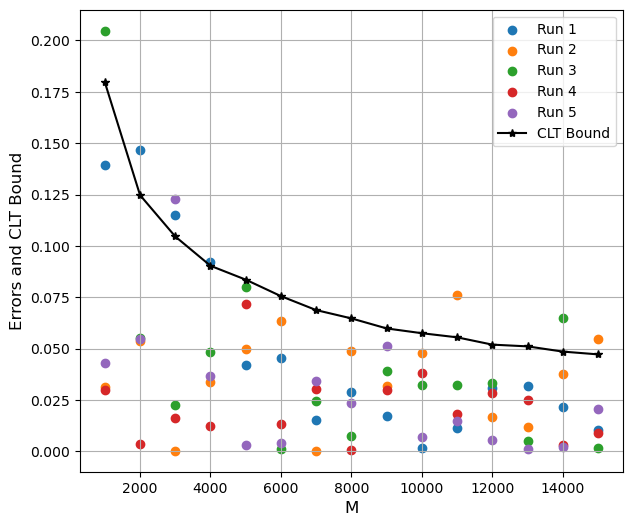

In [6]:
# Plot the errors against M for all runs
plt.figure(figsize=(7, 6))
for run, data in results.items():
    plt.scatter(M, data['errors'], label=run, marker='o')  # Plot errors for each run

# Plot CLT bounds for the first run only
first_run = list(results.keys())[4]
plt.plot(M,results[first_run]['clt_bounds'], label="CLT Bound", color='black', marker='*')

plt.xlabel('M', fontsize=12)
plt.ylabel('Errors and CLT Bound', fontsize=12)
# plt.title('Errors vs Number of Simulations (M)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# Log scale plot

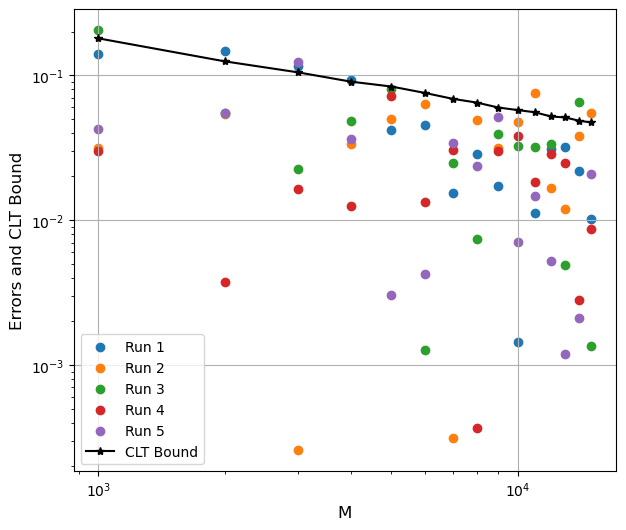

In [7]:
# Plot the errors against M for all runs
plt.figure(figsize=(7, 6))
for run, data in results.items():
    plt.scatter(M, data['errors'], label=run, marker='o')  # Plot errors for each run

# Plot CLT bounds for the first run only
first_run = list(results.keys())[4]
plt.loglog(M, results[first_run]['clt_bounds'], label="CLT Bound", color='black', marker='*')

plt.xlabel('M', fontsize=12)
plt.ylabel('Errors and CLT Bound', fontsize=12)
# plt.title('Errors vs Number of Simulations (M)', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()